In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# jpy = web.DataReader('DEXJPUS', 'fred',start='2020-07-16',end='2020-12-08')

In [4]:
# jpy = jpy.dropna()

In [110]:
eur = web.DataReader('EURUSD=X','yahoo',start='2015-07-16',end='2020-12-11')
eur = pd.DataFrame(eur)

In [111]:
eur

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-15,1.095000,1.085940,1.093888,1.094355,0.0,1.094355
2015-07-16,1.091000,1.084391,1.088601,1.088601,0.0,1.088601
2015-07-19,1.087200,1.082157,1.083295,1.083025,0.0,1.083025
2015-07-20,1.094070,1.081270,1.083482,1.083541,0.0,1.083541
2015-07-21,1.097000,1.088140,1.093900,1.093996,0.0,1.093996
...,...,...,...,...,...,...
2020-12-07,1.216353,1.208080,1.212062,1.212136,0.0,1.212136
2020-12-08,1.213416,1.209716,1.210947,1.211314,0.0,1.211314
2020-12-09,1.214900,1.207394,1.210991,1.211094,0.0,1.211094


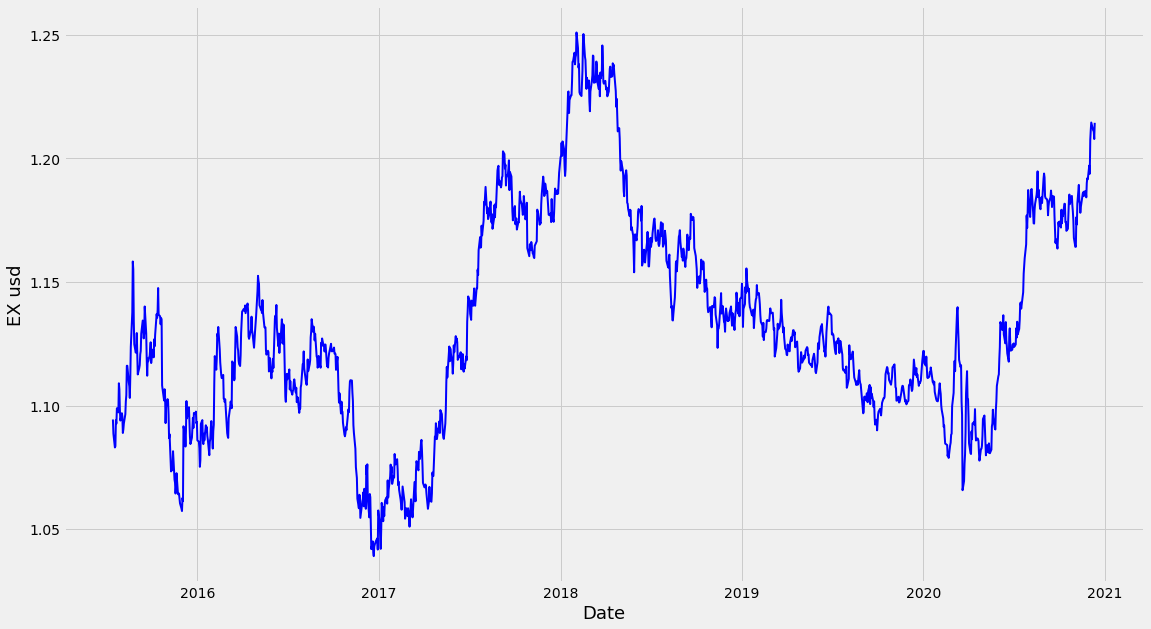

In [112]:
fig = plt.figure(figsize =(15,8))
plt.title = ('exchange rate')
# plt.plot(jpy['DEXJPUS'])
axes= fig.add_axes([0,0,1,1])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('EX usd', fontsize = 18)
axes.plot(eur['Adj Close'], color='blue', linewidth=2)
plt.show()

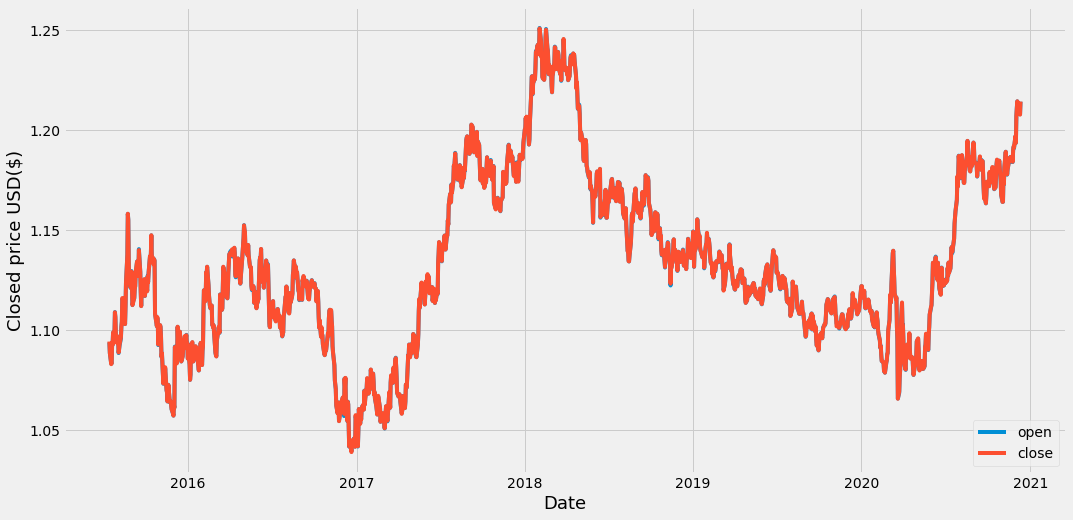

In [113]:

plt.figure(figsize = (16,8))
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closed price USD($)',fontsize  =18)
plt.plot(eur[['Open','Close']])
plt.legend(['open','close'],loc = 'lower right')
plt.show()

In [114]:
eurval = eur['Adj Close'].values
eurval = eurval.reshape(-1,1)

In [115]:
eurval

array([[1.09435534],
       [1.08860123],
       [1.08302462],
       ...,
       [1.21109366],
       [1.20787537],
       [1.21442938]])

In [116]:
training = round((len(eurval)*0.8))

In [117]:
training

1127

In [118]:
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata = scaler.fit_transform(eurval)

In [119]:
scaleddata.shape

(1409, 1)

In [120]:
traindataset = scaleddata[0:training ,: ]
X_train = []
y_train = []

for i in range(60, len(traindataset)):
  X_train.append(traindataset[i-60:i,0])
  y_train.append(traindataset[i,0])

In [121]:
len(X_train)

1067

In [122]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [123]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.26094393],
        [0.23379593],
        [0.2074854 ],
        ...,
        [0.39467378],
        [0.37967092],
        [0.41401185]],

       [[0.23379593],
        [0.2074854 ],
        [0.20992185],
        ...,
        [0.37967092],
        [0.41401185],
        [0.40080596]],

       [[0.2074854 ],
        [0.20992185],
        [0.25924932],
        ...,
        [0.41401185],
        [0.40080596],
        [0.42295226]],

       ...,

       [[0.33185583],
        [0.32680913],
        [0.33371466],
        ...,
        [0.3225819 ],
        [0.32078887],
        [0.29686866]],

       [[0.32680913],
        [0.33371466],
        [0.33040475],
        ...,
        [0.32078887],
        [0.29686866],
        [0.29816394]],

       [[0.33371466],
        [0.33040475],
        [0.32721464],
        ...,
        [0.29686866],
        [0.29816394],
        [0.30430401]]])

In [124]:
y_train

array([0.40080596, 0.42295226, 0.46212672, ..., 0.29816394, 0.30430401,
       0.29341027])

In [125]:
model = Sequential()
model.add(LSTM(50,return_sequences=True , input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [126]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [127]:
model.fit(X_train,y_train,batch_size = 10,epochs = 50)

Epoch 1/50
107/107 [==============================] - 4s 42ms/step - loss: 0.0128
Epoch 2/50
107/107 [==============================] - 5s 42ms/step - loss: 0.0028
Epoch 3/50
107/107 [==============================] - 5s 43ms/step - loss: 0.0024
Epoch 4/50
107/107 [==============================] - 4s 42ms/step - loss: 0.0022
Epoch 5/50
107/107 [==============================] - 5s 43ms/step - loss: 0.0020
Epoch 6/50
107/107 [==============================] - 5s 42ms/step - loss: 0.0020
Epoch 7/50
107/107 [==============================] - 5s 42ms/step - loss: 0.0015
Epoch 8/50
107/107 [==============================] - 5s 42ms/step - loss: 0.0014
Epoch 9/50
107/107 [==============================] - 4s 42ms/step - loss: 0.0013
Epoch 10/50
107/107 [==============================] - 5s 43ms/step - loss: 0.0011
Epoch 11/50
107/107 [==============================] - 4s 41ms/step - loss: 9.1855e-04
Epoch 12/50
107/107 [==============================] - 5s 42ms/step - loss: 8.1908e-04
Epoch

In [128]:
test_data = scaleddata[training-60:,:]
X_test = []
y_test = eurval[training:,:]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [129]:
training-60

1067

In [130]:
len(X_test)+60

342

In [131]:
y_test.shape

(282, 1)

In [132]:
X_test

[array([0.33040475, 0.32721464, 0.35506905, 0.33650545, 0.33005661,
        0.32808416, 0.31680235, 0.28370159, 0.27272349, 0.2755632 ,
        0.30407453, 0.30470671, 0.29730399, 0.31040189, 0.31132315,
        0.2939249 , 0.31507063, 0.32692499, 0.29037989, 0.32281306,
        0.30240861, 0.31045925, 0.29655933, 0.28461385, 0.29552783,
        0.26535508, 0.25113063, 0.26054798, 0.24023352, 0.25687868,
        0.27045352, 0.27596084, 0.28125163, 0.27442653, 0.26875329,
        0.28182138, 0.29278091, 0.30173144, 0.30126069, 0.3039598 ,
        0.32292892, 0.34758084, 0.36105107, 0.35917311, 0.3485741 ,
        0.35003529, 0.33662187, 0.3273305 , 0.33435415, 0.34174618,
        0.36046389, 0.36169674, 0.36616413, 0.3482237 , 0.3225819 ,
        0.32078887, 0.29686866, 0.29816394, 0.30430401, 0.29341027]),
 array([0.32721464, 0.35506905, 0.33650545, 0.33005661, 0.32808416,
        0.31680235, 0.28370159, 0.27272349, 0.2755632 , 0.30407453,
        0.30470671, 0.29730399, 0.31040189, 0.

In [133]:
test_data

array([[0.33040475],
       [0.32721464],
       [0.35506905],
       [0.33650545],
       [0.33005661],
       [0.32808416],
       [0.31680235],
       [0.28370159],
       [0.27272349],
       [0.2755632 ],
       [0.30407453],
       [0.30470671],
       [0.29730399],
       [0.31040189],
       [0.31132315],
       [0.2939249 ],
       [0.31507063],
       [0.32692499],
       [0.29037989],
       [0.32281306],
       [0.30240861],
       [0.31045925],
       [0.29655933],
       [0.28461385],
       [0.29552783],
       [0.26535508],
       [0.25113063],
       [0.26054798],
       [0.24023352],
       [0.25687868],
       [0.27045352],
       [0.27596084],
       [0.28125163],
       [0.27442653],
       [0.26875329],
       [0.28182138],
       [0.29278091],
       [0.30173144],
       [0.30126069],
       [0.3039598 ],
       [0.32292892],
       [0.34758084],
       [0.36105107],
       [0.35917311],
       [0.3485741 ],
       [0.35003529],
       [0.33662187],
       [0.327

In [134]:
y_test

array([[1.10132158],
       [1.10204983],
       [1.10550988],
       [1.10723579],
       [1.10800016],
       [1.10788596],
       [1.10658634],
       [1.1022563 ],
       [1.10144293],
       [1.1022563 ],
       [1.10048532],
       [1.10117614],
       [1.10190415],
       [1.10791051],
       [1.10852456],
       [1.10830343],
       [1.11054349],
       [1.10588884],
       [1.10649943],
       [1.10927463],
       [1.11358571],
       [1.11860573],
       [1.11244607],
       [1.11369741],
       [1.11513805],
       [1.11159277],
       [1.1125946 ],
       [1.10798407],
       [1.10938537],
       [1.1090163 ],
       [1.10954547],
       [1.11011195],
       [1.11823046],
       [1.12022972],
       [1.12208259],
       [1.12208259],
       [1.11714375],
       [1.11619604],
       [1.11979949],
       [1.11547387],
       [1.11132109],
       [1.11111116],
       [1.11166692],
       [1.11357331],
       [1.11308992],
       [1.11540043],
       [1.11395788],
       [1.109

In [135]:
Xtest = np.array(X_test)

In [136]:
X_test = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1))

In [137]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

In [156]:
pred

array([[1.1019462],
       [1.1018807],
       [1.1025451],
       [1.1056901],
       [1.1077358],
       [1.108703 ],
       [1.1086508],
       [1.1073792],
       [1.1033086],
       [1.1018642],
       [1.1022931],
       [1.1009246],
       [1.1013709],
       [1.1021353],
       [1.1075072],
       [1.1089965],
       [1.1090219],
       [1.1108494],
       [1.106951 ],
       [1.1067891],
       [1.1090883],
       [1.1132547],
       [1.1183552],
       [1.1135858],
       [1.1139796],
       [1.1151344],
       [1.1121327],
       [1.1126375],
       [1.1086135],
       [1.1093656],
       [1.1091847],
       [1.1097522],
       [1.1104113],
       [1.1177515],
       [1.1205757],
       [1.1225942],
       [1.1226816],
       [1.1180738],
       [1.1165502],
       [1.1194782],
       [1.1159467],
       [1.1119246],
       [1.1112323],
       [1.1116914],
       [1.1135961],
       [1.1135432],
       [1.1156739],
       [1.1146622],
       [1.110532 ],
       [1.1101245],


In [139]:
rmse = np.sqrt(np.mean(pred-y_test)**2)

In [140]:
rmse

0.00011919407134360455

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


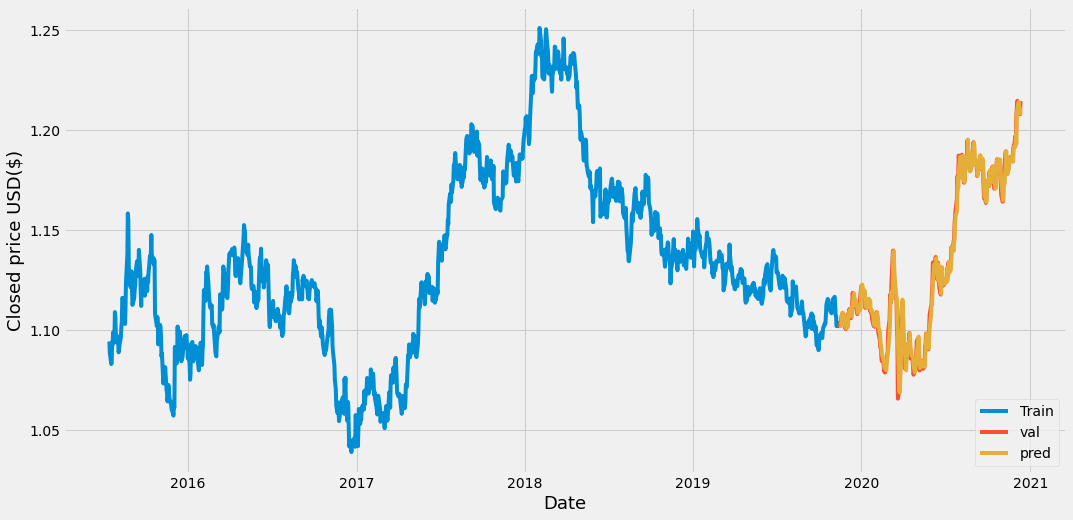

In [141]:
train = eur[:training]
valid = eur[training:]
valid['pred'] = pred
plt.figure(figsize = (16,8))
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closed price USD($)',fontsize  =18)
plt.plot(train['Adj Close'],)
plt.plot(valid[['Adj Close','pred']])
plt.legend(['Train','val','pred'],loc = 'lower right')
plt.show()

In [142]:
valid

,High,Low,Open,Close,Volume,Adj Close,pred
Date,,,,,,,
2019-11-14,1.101783,1.099082,1.100873,1.101322,0.0,1.101322,1.101946
2019-11-15,1.105583,1.101528,1.102293,1.102050,0.0,1.102050,1.101881
2019-11-18,1.109100,1.105400,1.105400,1.105510,0.0,1.105510,1.102545
2019-11-19,1.108525,1.106427,1.107224,1.107236,0.0,1.107236,1.105690
2019-11-20,1.108279,1.105363,1.108033,1.108000,0.0,1.108000,1.107736
...,...,...,...,...,...,...,...
2020-12-07,1.216353,1.208080,1.212062,1.212136,0.0,1.212136,1.214000
2020-12-08,1.213416,1.209716,1.210947,1.211314,0.0,1.211314,1.210999
2020-12-09,1.214900,1.207394,1.210991,1.211094,0.0,1.211094,1.210981


In [191]:
last_60_days = eur['Adj Close'][-60:].values

In [192]:
u = (list(last_60_days))

In [226]:
u.append(1.2148969)
list60 = u

In [233]:
u

[1.1845533847808838,
 1.176800012588501,
 1.1708368062973022,
 1.1658544540405273,
 1.1673243045806885,
 1.1635348796844482,
 1.167883276939392,
 1.1742050647735596,
 1.1726078987121582,
 1.1744946241378784,
 1.1720443964004517,
 1.1792453527450562,
 1.1737639904022217,
 1.176747441291809,
 1.1767003536224365,
 1.181683897972107,
 1.1816140413284302,
 1.1742188930511475,
 1.1743981838226318,
 1.1707134246826172,
 1.1715501546859741,
 1.176885962486267,
 1.1829839944839478,
 1.1853959560394287,
 1.1815024614334106,
 1.1848480701446533,
 1.1809443235397339,
 1.1784114837646484,
 1.1748672723770142,
 1.1678695678710938,
 1.1642121076583862,
 1.1642799377441406,
 1.176221489906311,
 1.17326819896698,
 1.1817537546157837,
 1.1893010139465332,
 1.182732105255127,
 1.1818794012069702,
 1.1780297756195068,
 1.1803393363952637,
 1.1845253705978394,
 1.1859441995620728,
 1.186366319656372,
 1.1847639083862305,
 1.1866477727890015,
 1.1866477727890015,
 1.1842728853225708,
 1.1900511980056763,
 1

In [225]:
train

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-15,1.095000,1.085940,1.093888,1.094355,0.0,1.094355
2015-07-16,1.091000,1.084391,1.088601,1.088601,0.0,1.088601
2015-07-19,1.087200,1.082157,1.083295,1.083025,0.0,1.083025
2015-07-20,1.094070,1.081270,1.083482,1.083541,0.0,1.083541
2015-07-21,1.097000,1.088140,1.093900,1.093996,0.0,1.093996
...,...,...,...,...,...,...
2019-11-07,1.109139,1.103801,1.107064,1.107040,0.0,1.107040
2019-11-08,1.103814,1.101780,1.103460,1.101970,0.0,1.101970
2019-11-11,1.104362,1.101722,1.102281,1.102244,0.0,1.102244


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


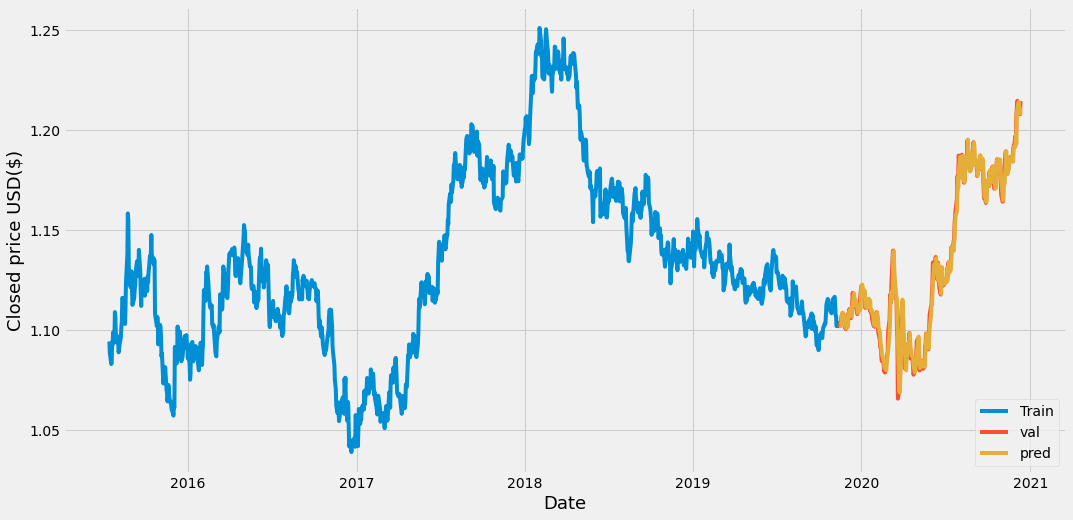

In [234]:
train = eur[:training]
valid = eur[training:]
valid['pred'] = pred
plt.figure(figsize = (16,8))
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closed price USD($)',fontsize  =18)
plt.plot(train['Adj Close'],)
plt.plot(valid[['Adj Close','pred']],)
plt.legend(['Train','val','pred','future'],loc = 'lower right')
plt.show()

In [236]:
valt = list(train['Adj Close'].values)
for i in valid['pred']:
  valt.append(i)

In [237]:
for i in u[-8:]:
  valt.append(i)

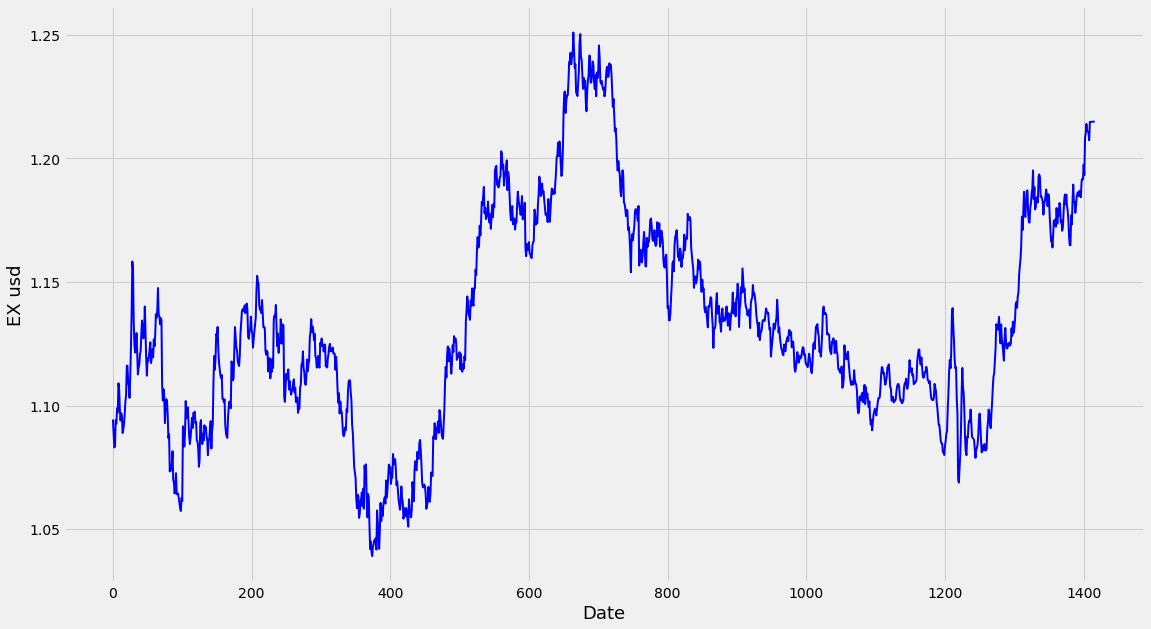

In [238]:
fig = plt.figure(figsize =(15,8))
plt.title = ('exchange rate')
# plt.plot(jpy['DEXJPUS'])
axes= fig.add_axes([0,0,1,1])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('EX usd', fontsize = 18)
axes.plot(valt, color='blue', linewidth=2)
plt.show()

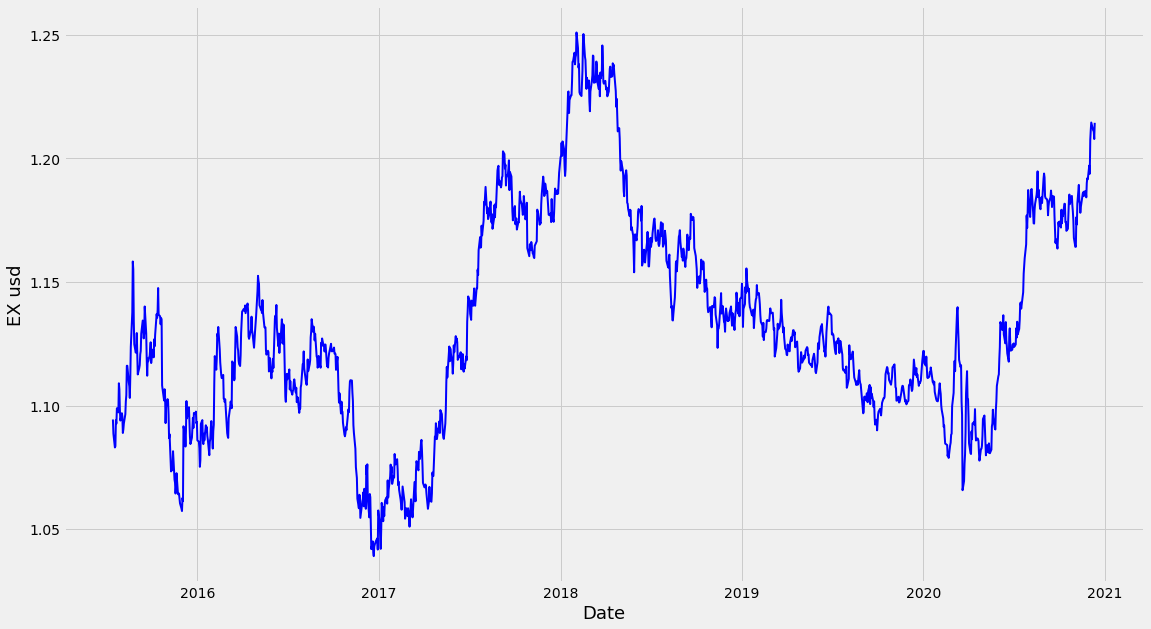

In [239]:
fig = plt.figure(figsize =(15,8))
plt.title = ('exchange rate')
# plt.plot(jpy['DEXJPUS'])
axes= fig.add_axes([0,0,1,1])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('EX usd', fontsize = 18)
axes.plot(eur['Adj Close'], color='blue', linewidth=2)
plt.show()

In [207]:
list60 = list60[-60:]
last_60_days = np.array(list60)
last_60_days = last_60_days.reshape(-1,1)
lastscaled = scaler.transform(last_60_days)
x_test = []
x_test.append(lastscaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
preddd = model.predict(x_test)
preddd = scaler.inverse_transform(preddd)
(preddd)

array([[1.2148969]], dtype=float32)